In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [10]:
# Load the dataset
df = pd.read_csv('spam.csv', delimiter=',', encoding='ISO-8859-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [11]:
# Preprocessing
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])




In [12]:
# Tokenization and TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf_vectorizer.fit_transform(df['v2'])
y = df['v1']

In [13]:
# Splitting into Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Function for Model Evaluation with Plots
def evaluate_model_plots(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n{model_name}:")
    print("Training Set:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))

    print("\nTesting Set:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


Naive Bayes:
Training Set:
Accuracy: 0.9863136638994839
Confusion Matrix:
 [[3860    0]
 [  61  536]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3860
           1       1.00      0.90      0.95       597

    accuracy                           0.99      4457
   macro avg       0.99      0.95      0.97      4457
weighted avg       0.99      0.99      0.99      4457


Testing Set:
Accuracy: 0.9820627802690582
Confusion Matrix:
 [[965   0]
 [ 20 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



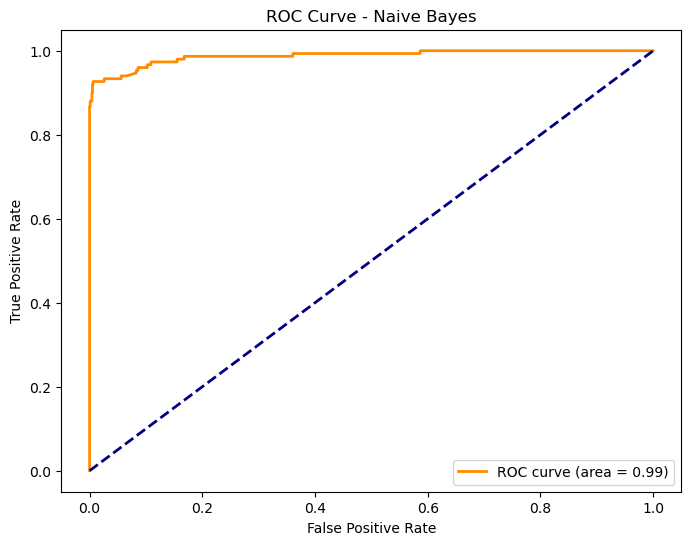

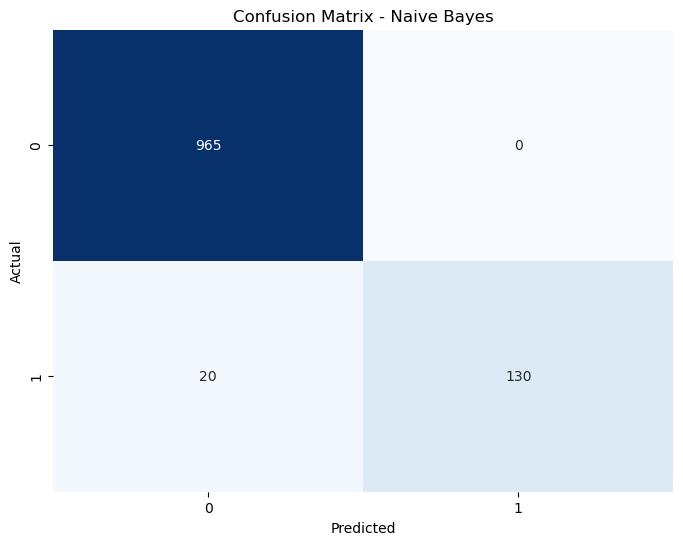

In [15]:
# Naive Bayes
nb_model = MultinomialNB()
evaluate_model_plots(nb_model, X_train, y_train, X_test, y_test, 'Naive Bayes')


Logistic Regression:
Training Set:
Accuracy: 0.9739735247924612
Confusion Matrix:
 [[3855    5]
 [ 111  486]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3860
           1       0.99      0.81      0.89       597

    accuracy                           0.97      4457
   macro avg       0.98      0.91      0.94      4457
weighted avg       0.97      0.97      0.97      4457


Testing Set:
Accuracy: 0.9551569506726457
Confusion Matrix:
 [[962   3]
 [ 47 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



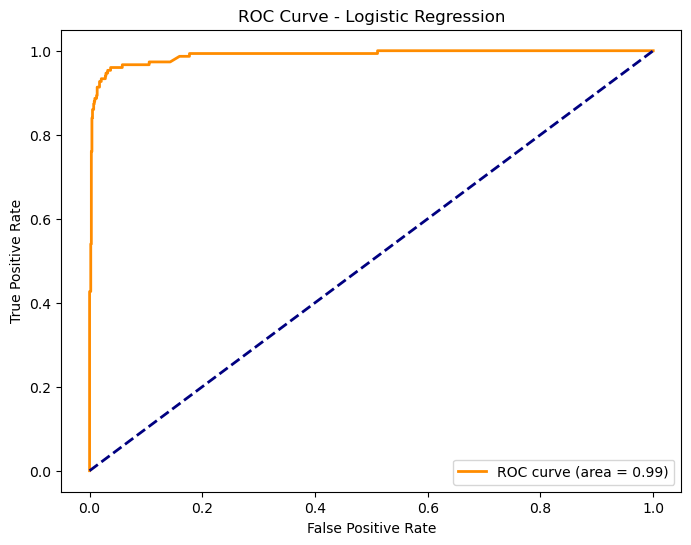

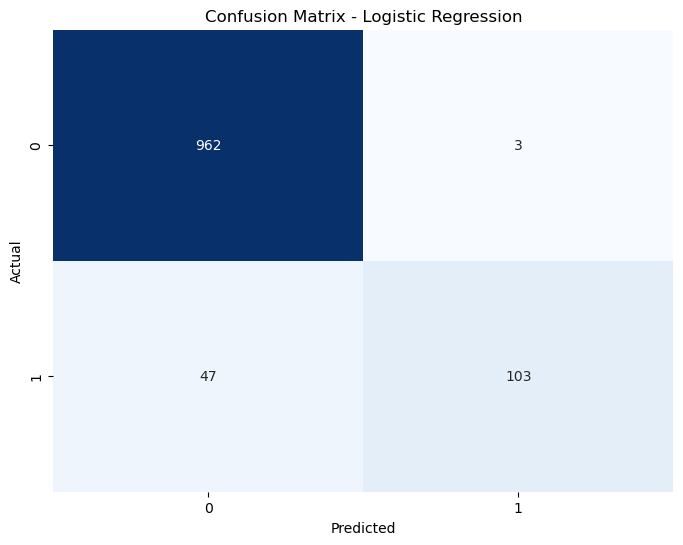

In [16]:
# Logistic Regression
lr_model = LogisticRegression()
evaluate_model_plots(lr_model, X_train, y_train, X_test, y_test, 'Logistic Regression')


Support Vector Machine:
Training Set:
Accuracy: 0.9975319721785955
Confusion Matrix:
 [[3860    0]
 [  11  586]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      0.98      0.99       597

    accuracy                           1.00      4457
   macro avg       1.00      0.99      0.99      4457
weighted avg       1.00      1.00      1.00      4457


Testing Set:
Accuracy: 0.9766816143497757
Confusion Matrix:
 [[964   1]
 [ 25 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



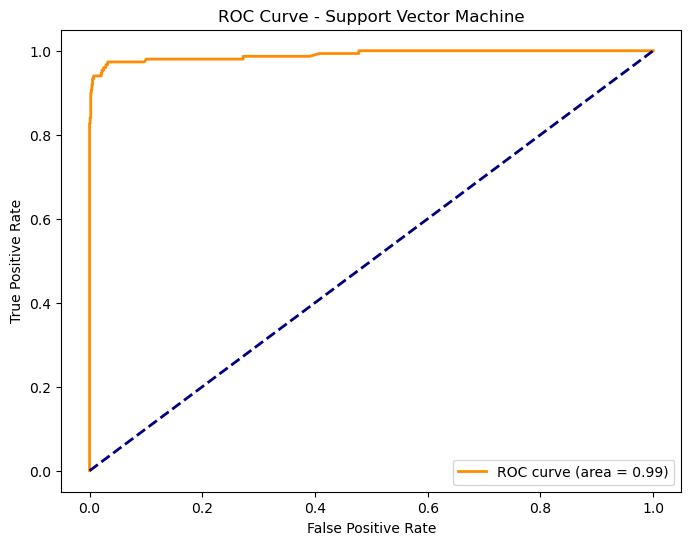

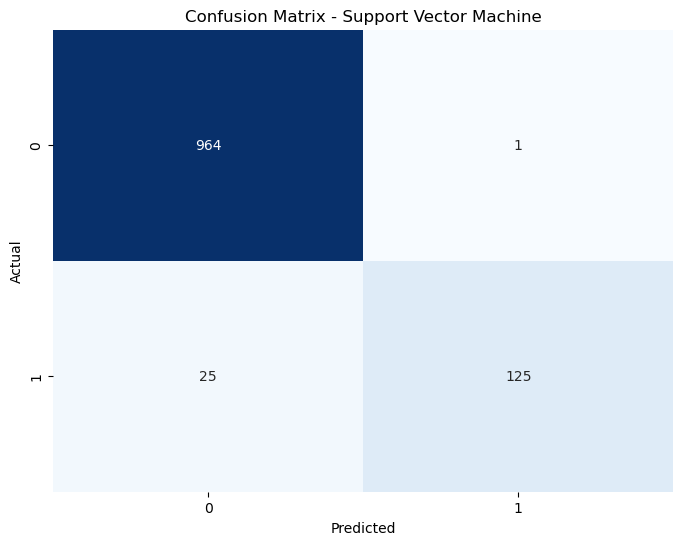

In [17]:
# Support Vector Machine
svm_model = SVC(probability=True)
evaluate_model_plots(svm_model, X_train, y_train, X_test, y_test, 'Support Vector Machine')